In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import glob
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

In [2]:
basepath = "C:/Users/Judit/Desktop/uab/quart/tfg/dades_tfg/data"
demographics = pd.read_csv(os.path.join(basepath, "demographics.csv"))
nodes = pd.read_csv(os.path.join(basepath, "nodes.csv"))
basepath_FA = os.path.join(basepath, "FA")
basepath_GM = os.path.join(basepath, "GM")
basepath_RS = os.path.join(basepath, "RS")

In [3]:
filenames = ["{:04d}.csv".format(x) for x in demographics["id"]]
filenames

['0000.csv',
 '0001.csv',
 '0002.csv',
 '0003.csv',
 '0004.csv',
 '0005.csv',
 '0006.csv',
 '0007.csv',
 '0008.csv',
 '0009.csv',
 '0010.csv',
 '0011.csv',
 '0012.csv',
 '0013.csv',
 '0014.csv',
 '0015.csv',
 '0016.csv',
 '0017.csv',
 '0018.csv',
 '0019.csv',
 '0020.csv',
 '0021.csv',
 '0022.csv',
 '0023.csv',
 '0024.csv',
 '0025.csv',
 '0026.csv',
 '0027.csv',
 '0028.csv',
 '0029.csv',
 '0030.csv',
 '0031.csv',
 '0032.csv',
 '0033.csv',
 '0034.csv',
 '0035.csv',
 '0036.csv',
 '0037.csv',
 '0038.csv',
 '0039.csv',
 '0040.csv',
 '0041.csv',
 '0042.csv',
 '0043.csv',
 '0044.csv',
 '0045.csv',
 '0046.csv',
 '0047.csv',
 '0048.csv',
 '0049.csv',
 '0050.csv',
 '0051.csv',
 '0052.csv',
 '0053.csv',
 '0054.csv',
 '0055.csv',
 '0056.csv',
 '0057.csv',
 '0058.csv',
 '0059.csv',
 '0060.csv',
 '0061.csv',
 '0062.csv',
 '0063.csv',
 '0064.csv',
 '0065.csv',
 '0066.csv',
 '0067.csv',
 '0068.csv',
 '0069.csv',
 '0070.csv',
 '0071.csv',
 '0072.csv',
 '0073.csv',
 '0074.csv',
 '0075.csv',
 '0076.csv',

In [4]:
data_FA = np.zeros(shape=(len(filenames), 76, 76))
data_GM = np.zeros(shape=(len(filenames), 76, 76))
data_RS = np.zeros(shape=(len(filenames), 76, 76))

In [5]:
for i, filename in enumerate(filenames):
    df_FA = pd.read_csv(os.path.join(basepath_FA, filename), header=None)
    data_FA[i,:,:] = df_FA.values
    
    df_GM = pd.read_csv(os.path.join(basepath_GM, filename), header=None)
    data_GM[i,:,:] = df_GM.values
    
    df_RS = pd.read_csv(os.path.join(basepath_RS, filename), header=None)
    data_RS[i,:,:] = df_RS.values

In [6]:
control_indices = demographics[demographics['mstype'] == -1].index
patient_indices = demographics[demographics['mstype'] >= 0].index

In [7]:
mean_FA_control = np.mean(data_FA[control_indices, :, :], axis=0)
mean_FA_patient = np.mean(data_FA[patient_indices, :, :], axis=0)
mean_GM_control = np.mean(data_GM[control_indices, :, :], axis=0)
mean_GM_patient = np.mean(data_GM[patient_indices, :, :], axis=0)
mean_RS_control = np.mean(data_RS[control_indices, :, :], axis=0)
mean_RS_patient = np.mean(data_RS[patient_indices, :, :], axis=0)

In [8]:
def plot_heatmap(matrix, title):
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    sns.heatmap(matrix, mask = mask, annot=False, cmap='coolwarm', 
                cbar_kws={"shrink": .5}, linewidths=.5, linecolor='gray')
    plt.title(title)
    plt.show()

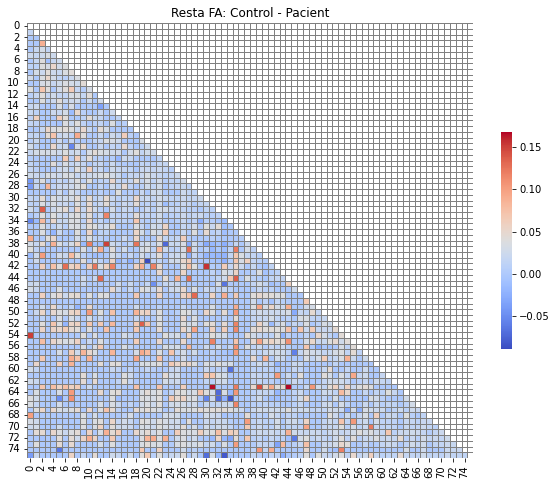

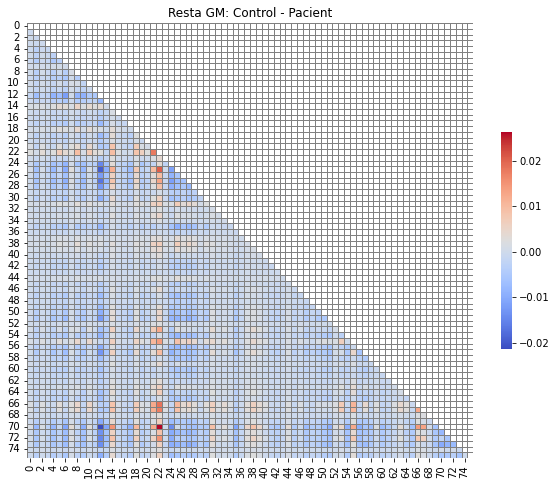

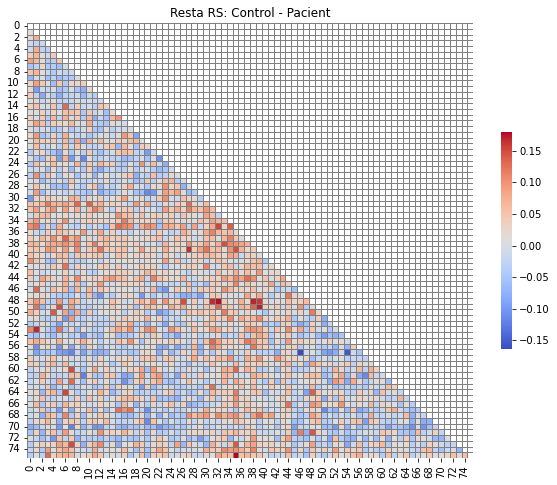

In [9]:
plot_heatmap(mean_FA_control - mean_FA_patient, "Resta FA: Control - Pacient")
plot_heatmap(mean_GM_control - mean_GM_patient, "Resta GM: Control - Pacient")
plot_heatmap(mean_RS_control - mean_RS_patient, "Resta RS: Control - Pacient")

In [10]:
controls_FA = data_FA[control_indices, :, :]
patients_FA = data_FA[patient_indices, :, :]
controls_GM = data_GM[control_indices, :, :]
patients_GM = data_GM[patient_indices, :, :]
controls_RS = data_RS[control_indices, :, :]
patients_RS = data_RS[patient_indices, :, :]
p_values_FA = np.zeros((76, 76))
p_values_GM = np.zeros((76, 76))
p_values_RS = np.zeros((76, 76))

In [11]:
for i in range(76):
    for j in range(i + 1, 76):  # simetría
        _, p_val = stats.ttest_ind(controls_FA[:, i, j], patients_FA[:, i, j])
        p_values_FA[i, j] = p_val
        p_values_FA[j, i] = p_val

        _, p_val = stats.ttest_ind(controls_GM[:, i, j], patients_GM[:, i, j])
        p_values_GM[i, j] = p_val
        p_values_GM[j, i] = p_val

        _, p_val = stats.ttest_ind(controls_RS[:, i, j], patients_RS[:, i, j])
        p_values_RS[i, j] = p_val
        p_values_RS[j, i] = p_val

In [12]:
def plot_heatmap(p_values, title): #,alpha_corrected
    plt.figure(figsize=(10, 8)) 
    mask = np.triu(np.ones_like(p_values, dtype=bool))
    sns.heatmap(p_values, mask = mask, cmap='viridis_r', annot=False,
                cbar_kws={"shrink": .5}, linewidths=.5, linecolor='gray')  #,vmax=alpha_corrected
    plt.title(title)
    plt.show()

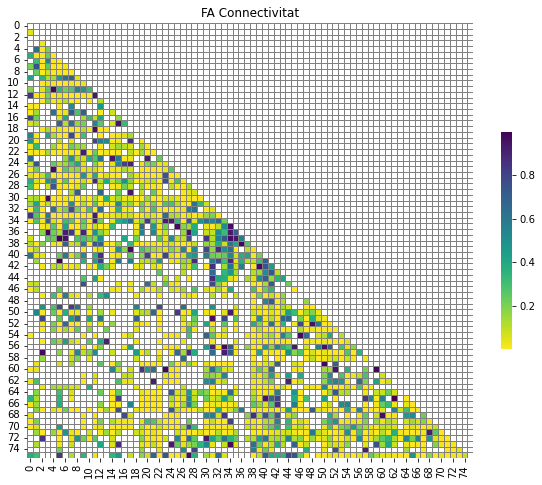

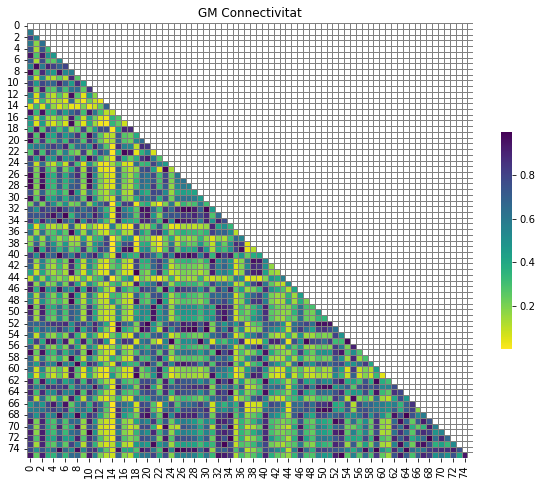

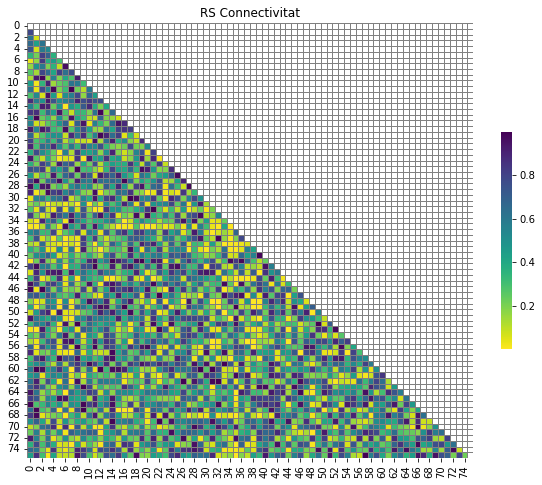

In [13]:
plot_heatmap(p_values_FA, 'FA Connectivitat')  #, alpha_corrected=0.001
plot_heatmap(p_values_GM, 'GM Connectivitat')  #, alpha_corrected=0.01
plot_heatmap(p_values_RS, 'RS Connectivitat')  #, alpha_corrected=0.01